# Mean event number

In [1]:
# First, determine the mean number of events detected with the settings
import numpy as np
# We count the number of events detected in 1 minute
Counts = [
    766,
    742,
    744,
    832,
    807,
    722,
    753,
    772,
    786,
    792,
    792,
    767,
    749,
    751,
    802
]

mean_count = np.mean(Counts)

print(f"Mean count : {mean_count:.0f} for {len(Counts)} measurements")

Mean count : 772 for 15 measurements


# TAC calibration

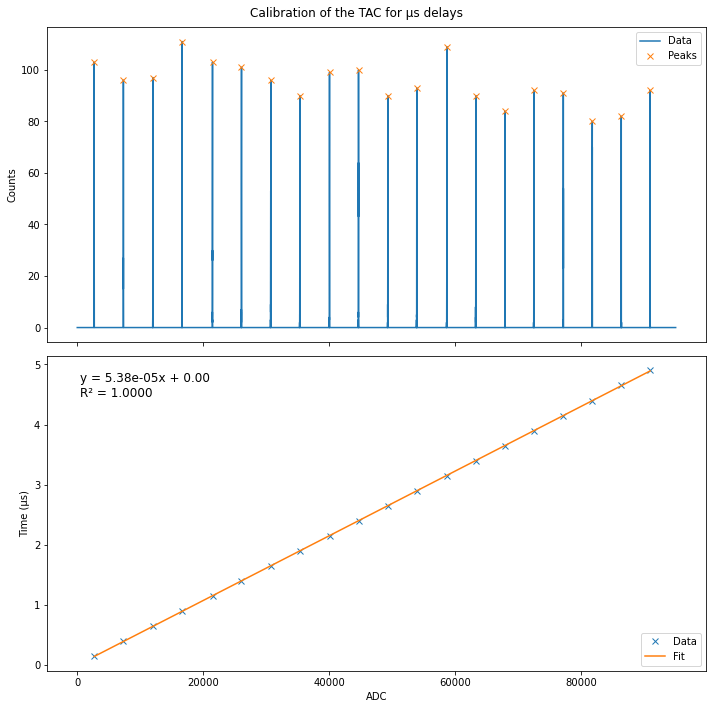

In [2]:
# We will calibrate the ADC-time conversion with the following data
import numpy as np
from scipy.signal import savgol_filter, find_peaks
from scipy.optimize import curve_fit
from calibration import linear, r_squared

# Calibrate the TAC
from muon import calibrate_TAC
popt, (fig, ax) = calibrate_TAC(plot_peaks=True, plot_fit=True)
fig.suptitle("Calibration of the TAC for µs delays")
fig.tight_layout()

# Store the calibration parameters
ADC_to_t = popt

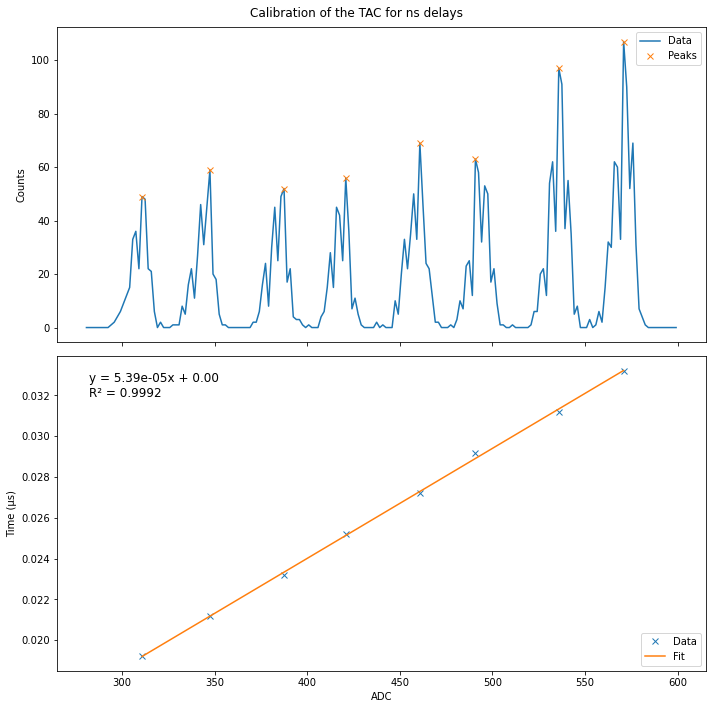

In [3]:
# We will calibrate the ADC-time conversion with the following data
import numpy as np
from scipy.signal import savgol_filter, find_peaks
from scipy.optimize import curve_fit
from calibration import linear, r_squared

# Calibrate the TAC
from muon import calibrate_TAC
_, (fig, ax) = calibrate_TAC(file = "data/TAC_calibration_spectrum_small_scales.txt",
                                times = (np.arange(16, 32, 2)+3.2)*1e-3,
                                ADC_range = (280, 600),
                                peak_width = 2,
                                peak_height = 40,
                                plot_peaks=True, plot_fit=True)
fig.suptitle("Calibration of the TAC for ns delays")
fig.tight_layout()

# First acquisition
This was our first test with different settings (hence the different calibration).
We are not sure if it actually has any physical meaning.

In [4]:
# Import the data
import matplotlib.pyplot as plt
import numpy as np
file = "data/muon_acquisition_15h40_15-09-2023.txt"
data = np.loadtxt(file, skiprows=2, delimiter=";") 

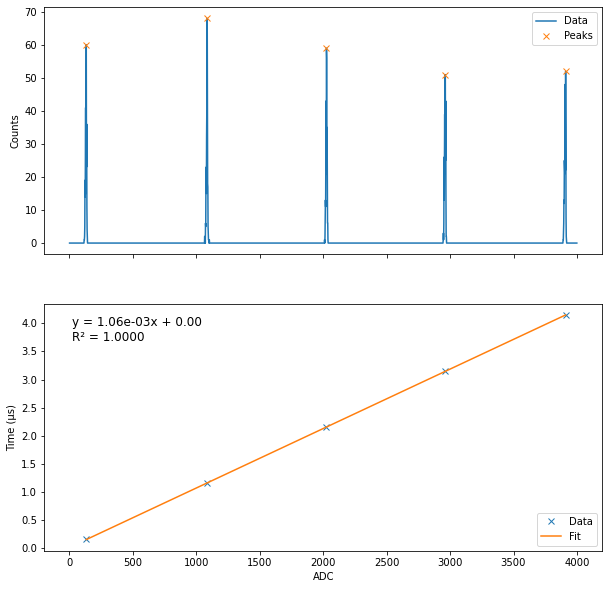

In [5]:
# Calibrate the data (this used another setting)
from muon import calibrate_TAC
ADC_to_t, _ = calibrate_TAC(file = "data/TAC_calibration_range200ns.txt",
                         times = np.arange(0,5, 1) + 0.150,
                         ADC_range = (0, 4000),
                         peak_height = 40,
                         peak_width = 1.9,
                         plot_peaks=True, plot_fit=True)

In [6]:
# Convert the data to time
from calibration import linear
data[:,0] = linear(data[:,0], *ADC_to_t)

In [7]:
# Fit an exponantial decay on the data
def exp(x, a, tau):
    return a * np.exp(-x/tau)

from scipy.optimize import curve_fit

mask = np.logical_and((data[:,0] > 20), (data[:,0] < 300)) 
x = data[:,0][mask]
y = data[:,1][mask]

popt, pcov = curve_fit(exp, x, y, p0=[1, 100])
popt

array([131.16514235,  15.24946281])

Text(0.5, 1.0, 'First fit of the data')

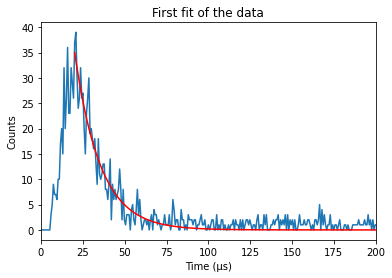

In [8]:
import matplotlib.pyplot as plt

plt.plot(data[:,0], data[:,1])
plt.xlim(0, 200)

plt.plot(x, exp(x, *popt), 'r-')
plt.xlabel("Time (µs)")
plt.ylabel("Counts")
plt.title("First fit of the data")

In [10]:
from calibration import linear
tau = popt[1]
print(f"Muon lifetime: {tau:.3f} µs")

Muon lifetime: 15.249 µs


This is *obviously* not the value we expect